# Animation of the Lorenz system for increasing *rho* and Lorenz system chaotic plot

# Combined Bachelor Thesis (NS-320B), June 2022
## Mathematics & Physics and Astronomy
*'Applying Physics-informed Neural Networks to Chaotic Systems of Ordinary Differential Equations'*

**Author:** Martijn Sebastiaan Brouwer (6859488)

**Mathematics supervisors:** prof. dr. ir. C.W. Oosterlee

**Physics supervisor:** dr. J. de Graaf

**PhD supervisor:** B. Negyesi

## Animation of the Lorenz system for increasing *rho*

mkdir: cannot create directory ‘plots’: File exists


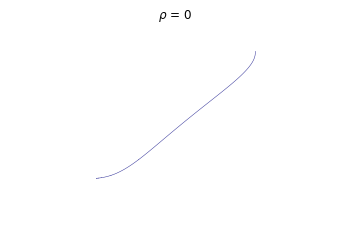

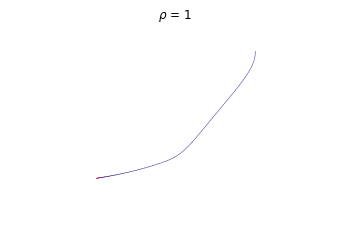

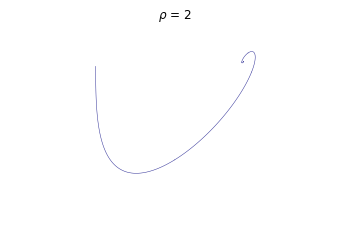

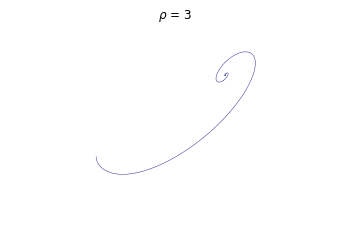

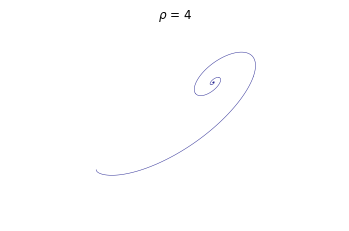

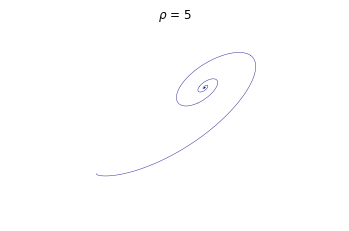

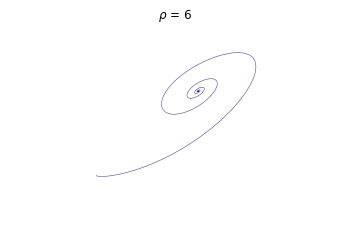

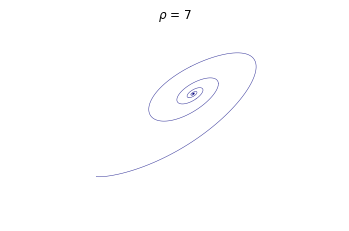

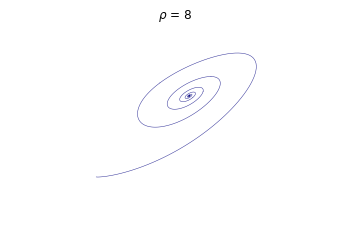

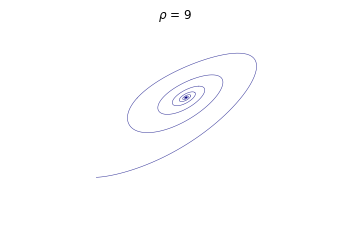

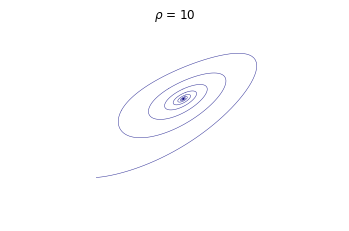

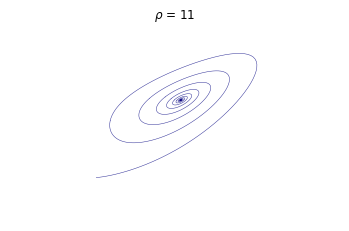

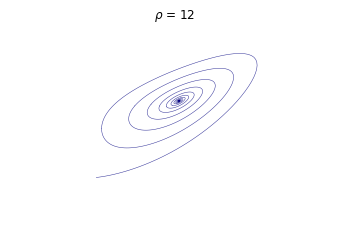

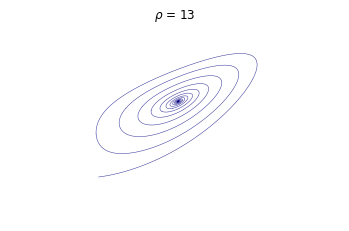

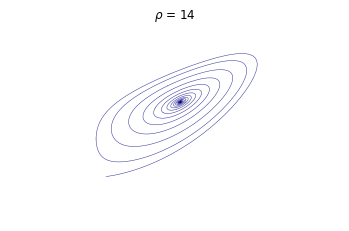

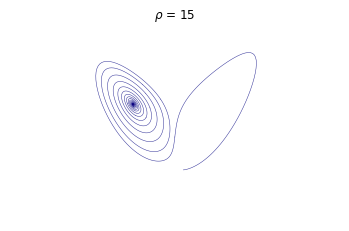

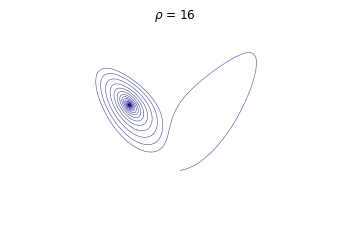

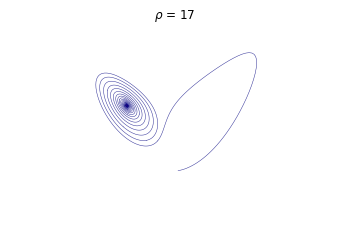

KeyboardInterrupt: ignored

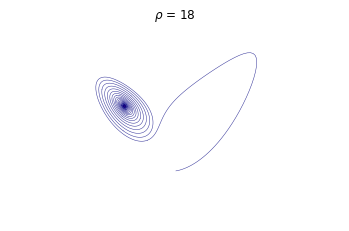

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

!mkdir plots

# ----------------------------------------------------------------------------- 
# ------------------------------ Definitions ---------------------------------- 
# ----------------------------------------------------------------------------- 
# Lorenz equations:
def dxdt(x,y,z): return -sigma*x + sigma*y
def dydt(x,y,z): return -x*z + rho*x - y
def dzdt(x,y,z): return x*y - beta*z

# Runge-Kutta fourth order method:
def RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf):
    n = (int)((tf - ti)/h)
    xl = n*[0]
    yl = n*[0]
    zl = n*[0]
    xl[0],yl[0],zl[0] = x0,y0,z0
    for i in range(1,n):
        x,y,z = xl[i-1],yl[i-1],zl[i-1]

        k1x,k1y,k1z = (h*f(x,y,z)    for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k1x,k1y,k1z,h)))
        k2x,k2y,k2z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k2x,k2y,k2z,h)))
        k3x,k3y,k3z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + kr        for r,kr in zip((x,y,z),(k3x,k3y,k3z,h)))
        k4x,k4y,k4z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        
        xl[i],yl[i],zl[i] = (r + (k1r + 2*k2r + 2*k3r + k4r)/6 for r,k1r,k2r,k3r,k4r in 
                zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))
    return xl,yl,zl


# ----------------------------------------------------------------------------- 
# ------------------------------- Animation ----------------------------------- 
# ----------------------------------------------------------------------------- 
files = []
sigma = 10
beta = 8/3
rho_list = np.arange(0,325,1) #rho list over which is iterated
for rho in rho_list:
    ti = 0
    tf = 100
    h = 0.01
    x0,y0,z0 = 1,1,1
    x,y,z = RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf)

    T = np.linspace(0,1,np.size(x))**2
    n = 10000
    s = 100
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(0,n-s,s): #Divide the solution in segments coloured from blue to red over time
        ax.plot(x[i:i+s+1],y[i:i+s+1],z[i:i+s+1], linewidth=0.5, color=(T[i],0,0.5), alpha=0.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('$\\rho$ = {}'.format(rho))
    ax.azim = -92
    ax.elev = 5
    plt.axis("off")
    file = "plots/%.4i.png"%(rho)
    plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
    files.append(file)
    plt.show()

def save_gif(outfile, files, fps=5, loop=0):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

save_gif("rho_animation.gif", files, fps=20, loop=0)

## Lorenz system chaotic plot

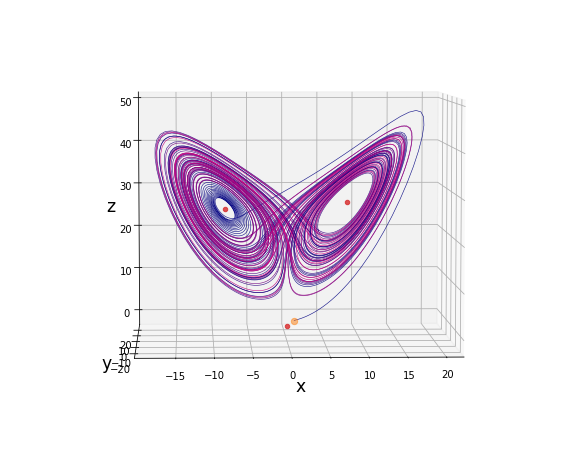

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ----------------------------------------------------------------------------- 
# ------------------------------ Definitions ---------------------------------- 
# ----------------------------------------------------------------------------- 
# Lorenz equations:
def dxdt(x,y,z): return -sigma*x + sigma*y
def dydt(x,y,z): return -x*z + rho*x - y
def dzdt(x,y,z): return x*y - beta*z

# Runge kutta fourth order method:
def RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf):
    n = (int)((tf - ti)/h)
    xl = n*[0]
    yl = n*[0]
    zl = n*[0]
    xl[0],yl[0],zl[0] = x0,y0,z0
    for i in range(1,n):
        x,y,z = xl[i-1],yl[i-1],zl[i-1]

        k1x,k1y,k1z = (h*f(x,y,z)    for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k1x,k1y,k1z,h)))
        k2x,k2y,k2z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k2x,k2y,k2z,h)))
        k3x,k3y,k3z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + kr        for r,kr in zip((x,y,z),(k3x,k3y,k3z,h)))
        k4x,k4y,k4z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        
        xl[i],yl[i],zl[i] = (r + (k1r + 2*k2r + 2*k3r + k4r)/6 for r,k1r,k2r,k3r,k4r in 
                zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))
    return xl,yl,zl

# ----------------------------------------------------------------------------- 
# -------------------------------- Plotting ----------------------------------- 
# ----------------------------------------------------------------------------- 
sigma = 10
beta = 8/3
rho = 28
ti = 0
tf = 100
h = 0.01
x0,y0,z0 = 1,1,1
x,y,z = RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf)

T = np.linspace(0,1,np.size(x))**2
n = 10000
s = 100
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1],y[i:i+s+1],z[i:i+s+1], linewidth=0.6, color=(T[i],0,0.5), alpha=0.9)
ax.set_xlabel('x', fontsize="xx-large")
ax.set_ylabel('y', fontsize="xx-large")
ax.set_zlabel('z', fontsize="xx-large")
ax.scatter(1,1,1, s=40, color="tab:orange", alpha=0.5)
ax.scatter(0,0,0, s=20, color="tab:red", alpha=0.8)
ax.scatter(np.sqrt(beta*(rho-1)),np.sqrt(beta*(rho-1)),rho-1, s=20, color="tab:red", alpha=0.8)
ax.scatter(-np.sqrt(beta*(rho-1)),-np.sqrt(beta*(rho-1)),rho-1, s=20, color="tab:red", alpha=0.8)
ax.azim = -92
ax.elev = 5
# plt.axis("off")
plt.savefig("%.2i.png"%(rho), bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
plt.show()